<a href="https://colab.research.google.com/github/Manish-2708/pyt_man/blob/main/crudeoilproject_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose # For time series decomposition
from pmdarima import auto_arima

%matplotlib inline

In [ ]:
from math import sqrt
import plotly.express as px
from scipy.stats import boxcox
import plotly.graph_objects as go
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

In [ ]:
#import dataset
df = pd.read_excel("/content/Crude Oil Prices Daily ....xlsx")
df.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [ ]:
df.tail()

,Date,Closing Value
9535,2023-09-12,93.58
9536,2023-09-13,93.04
9537,2023-09-14,95.20
9538,2023-09-15,95.55
9539,2023-09-18,95.95


In [ ]:
#Data exploration
df.isnull().sum()

Date             0
Closing Value    6
dtype: int64

In [ ]:
df.shape

(9540, 2)

In [ ]:
df.nunique()

Date             9540
Closing Value    5405
dtype: int64

In [ ]:
df.dtypes

Date             datetime64[ns]
Closing Value           float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9540 non-null   datetime64[ns]
 1   Closing Value  9534 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.2 KB


In [ ]:
#data cleaning
new_df = df.dropna()

In [ ]:
new_df

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9535,2023-09-12,93.58
9536,2023-09-13,93.04
9537,2023-09-14,95.20
9538,2023-09-15,95.55


In [ ]:
new_df.set_index('Date',inplace=True)

In [ ]:
new_df.head(10)

,Closing Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
1986-01-09,26.03
1986-01-10,25.65
1986-01-13,25.08
1986-01-14,24.97


In [ ]:
new_df.shape

(9534, 1)

In [ ]:
new_df.describe()

,Closing Value
count,9534.000000
mean,47.329012
std,30.156943
min,9.120000
25%,20.080000
50%,37.760000
75%,70.900000
max,145.310000


Data Visualization

In [ ]:
#Separating Month and Year into Separate Column for Visualization for meaningful insight of the data
df["Date"]  = pd.to_datetime(df.Date, format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"]  = df.Date.dt.strftime("%Y") # year extraction
df.head(10)

,Date,Closing Value,month,year
0,1986-01-02,25.56,Jan,1986
1,1986-01-03,26.00,Jan,1986
2,1986-01-06,26.53,Jan,1986
3,1986-01-07,25.85,Jan,1986
4,1986-01-08,25.87,Jan,1986
5,1986-01-09,26.03,Jan,1986
6,1986-01-10,25.65,Jan,1986
7,1986-01-13,25.08,Jan,1986
8,1986-01-14,24.97,Jan,1986
9,1986-01-15,25.18,Jan,1986


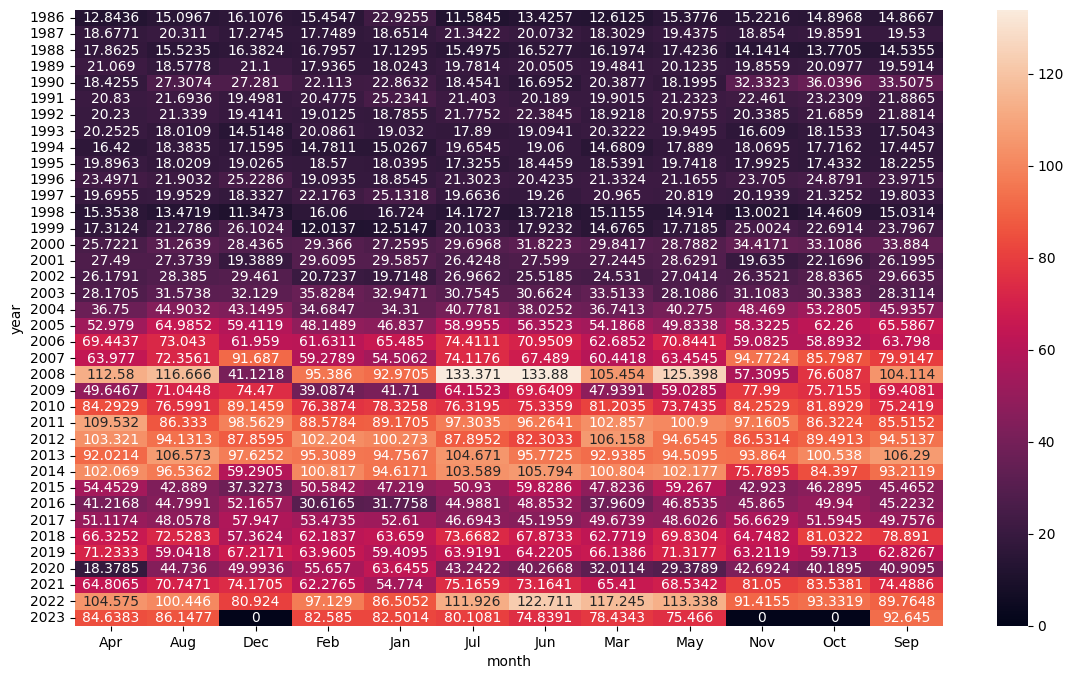

In [ ]:
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=df,values="Closing Value",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.show()

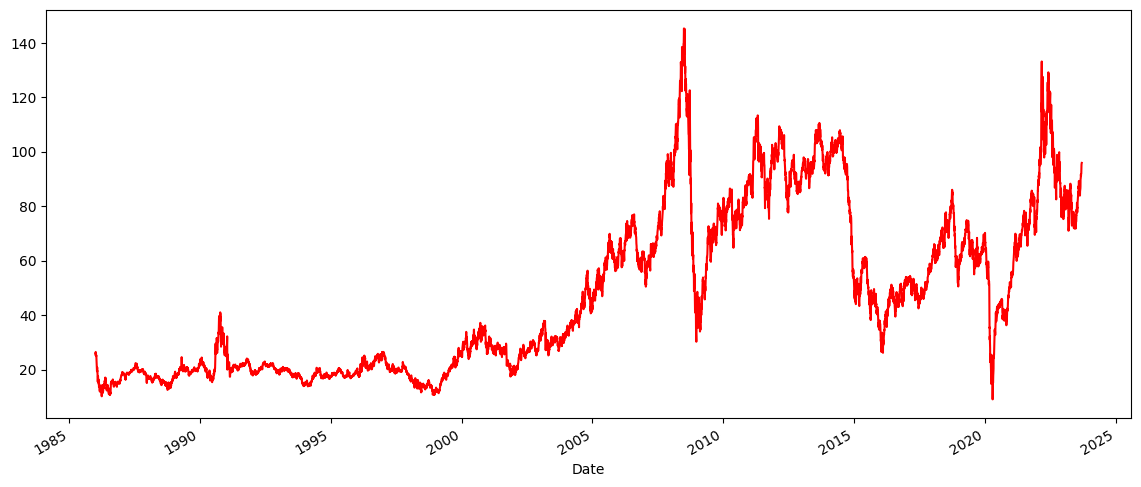

In [ ]:
#line plot
new_df['Closing Value'].plot(figsize=(14,6),color='red')
plt.show()

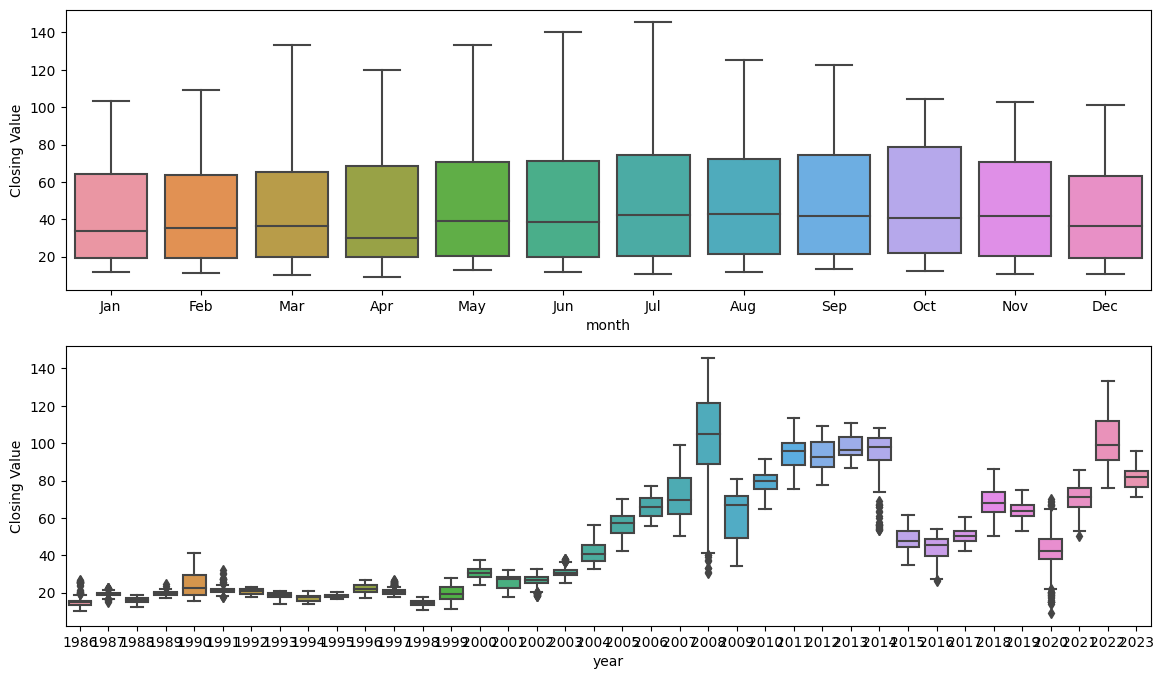

In [ ]:
#Box Plot of Each Year by Monthly Intervals
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month", y="Closing Value", data=df)
plt.subplot(212)
sns.boxplot(x="year", y="Closing Value", data=df)
plt.show()

In [ ]:
new_df_pd=pd.DataFrame(new_df)
new_df_pd.rename(columns = {'Closing Value':'closingvalue', }, inplace = True)
print(new_df_pd.columns)

Index(['closingvalue'], dtype='object')


Histogram and Density Plots

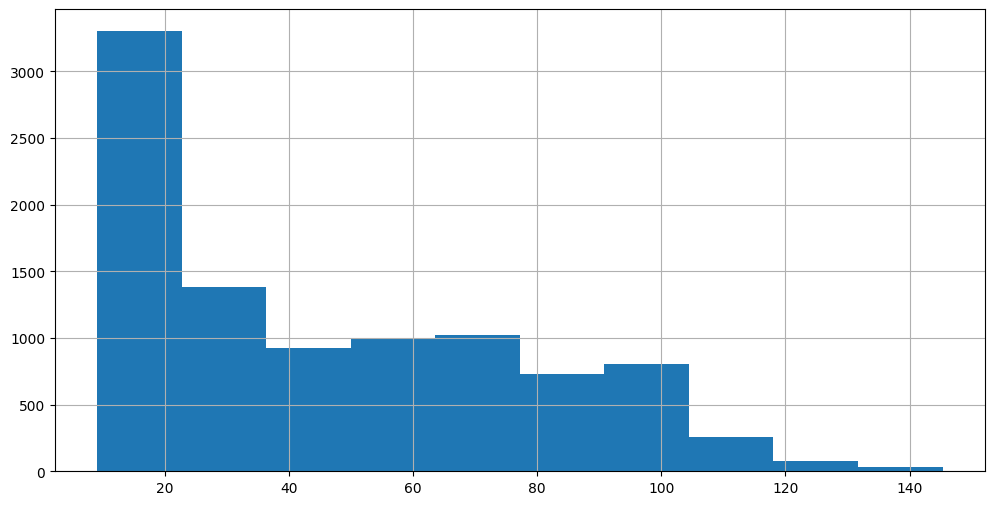

In [ ]:
new_df.closingvalue.hist(figsize=(12,6))
plt.show()

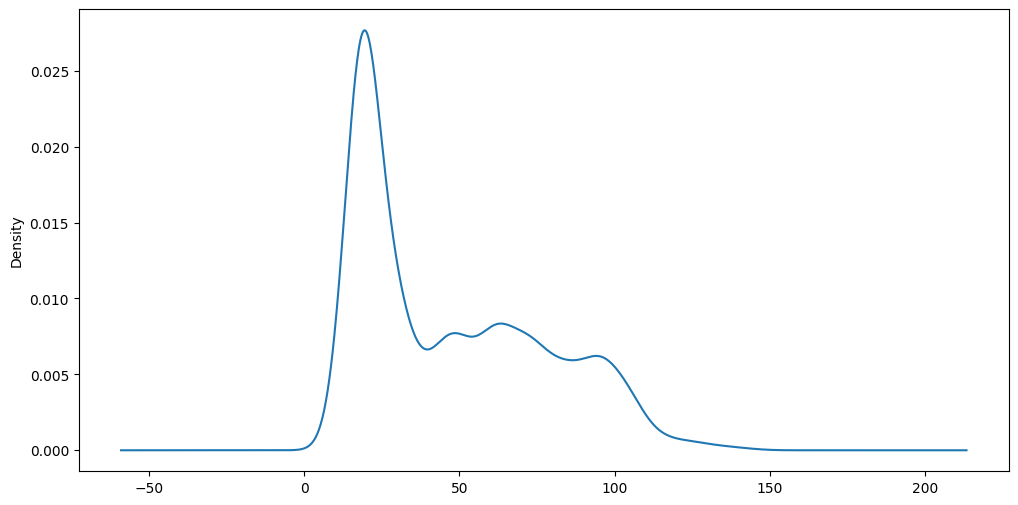

In [ ]:
new_df.closingvalue.plot(kind='kde', figsize=(12,6))
plt.show()

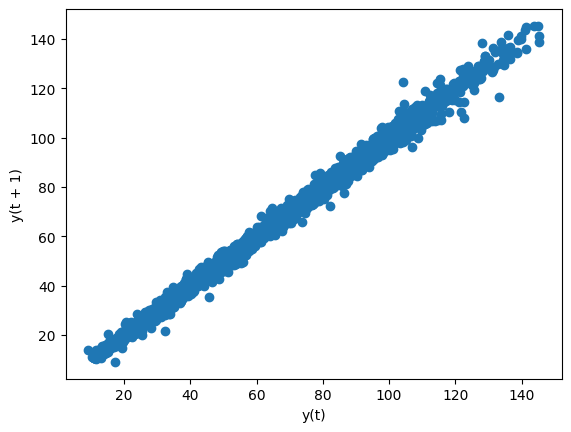

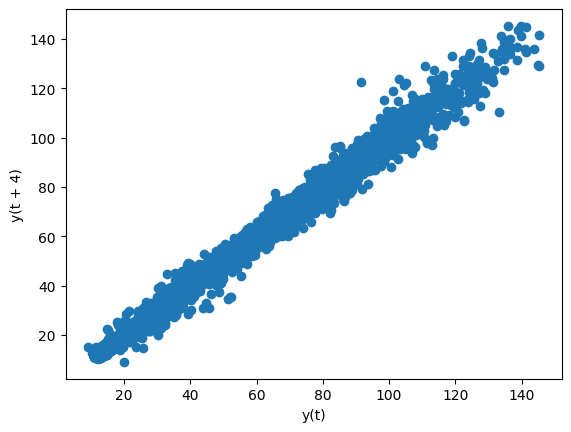

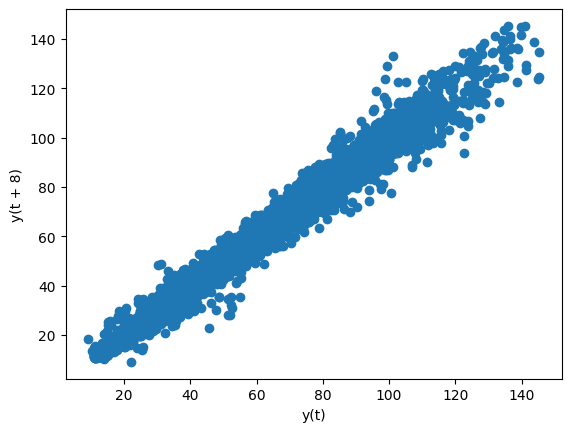

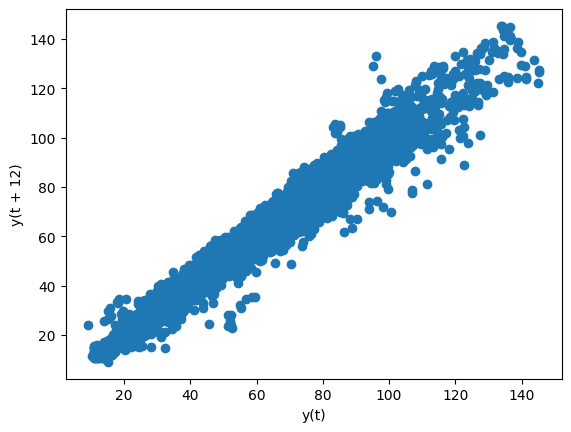

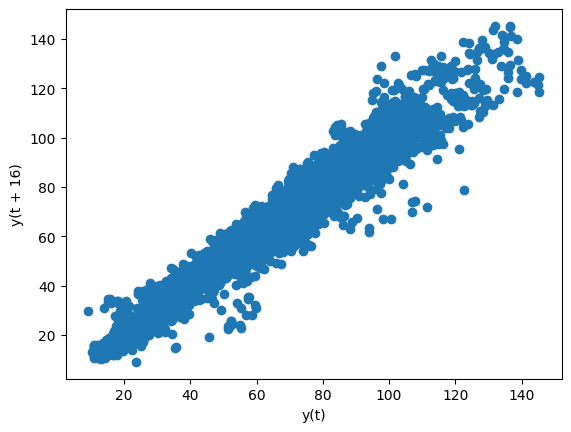

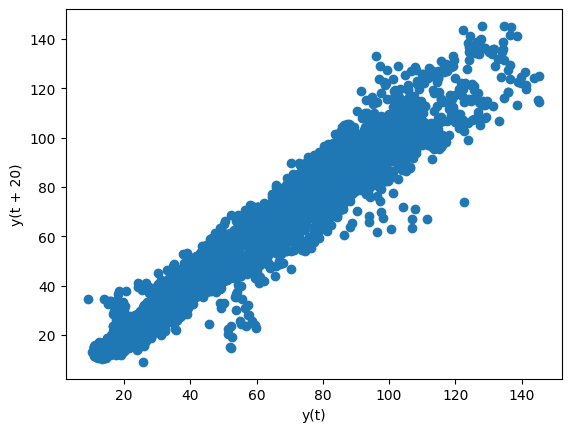

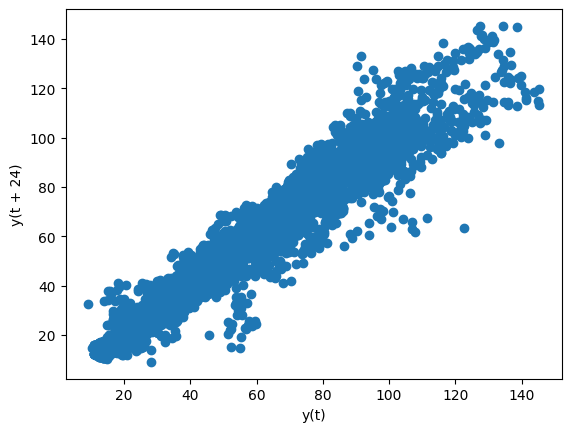

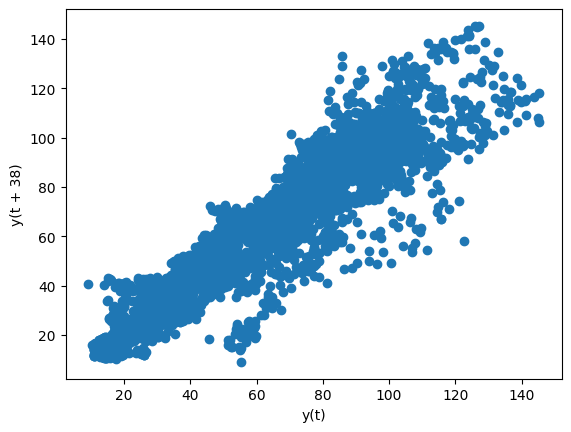

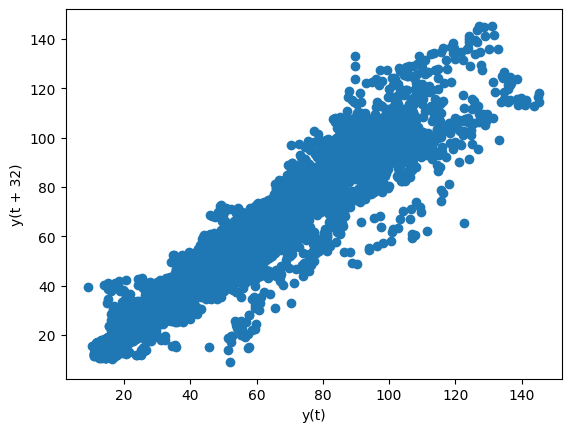

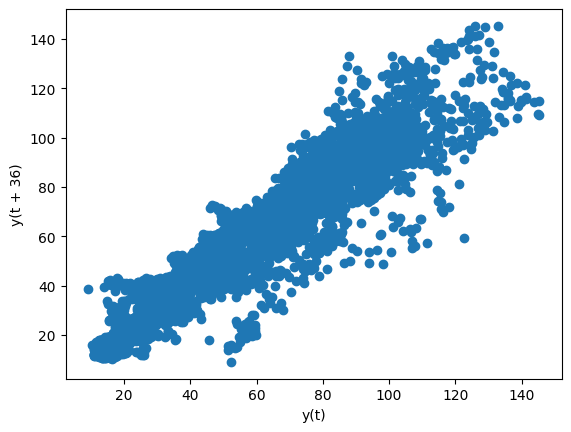

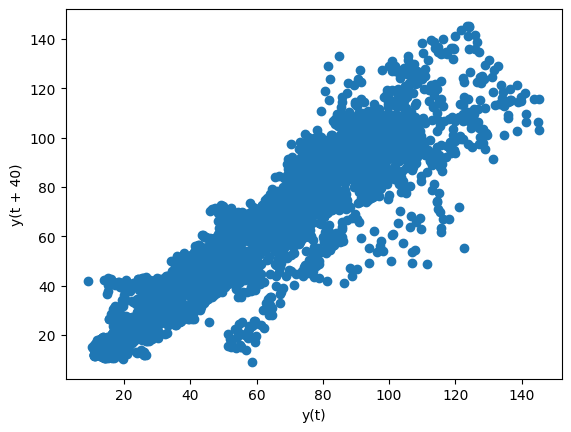

In [ ]:
# create a scatter plot
for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    #plt.figure(figsize=(12,8))
    lag_plot(new_df.closingvalue, lag=i)
    plt.show()

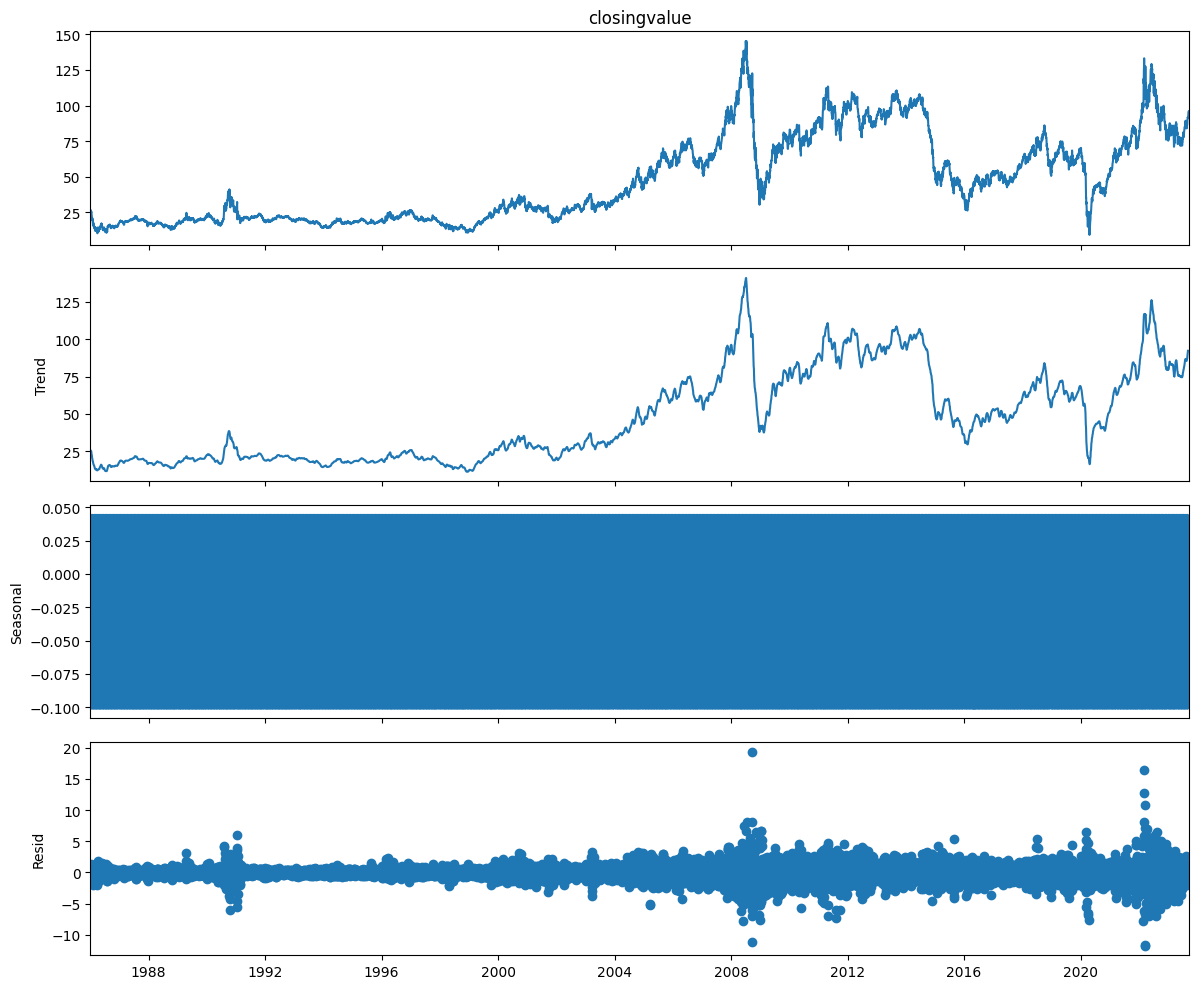

In [ ]:
# Time series decomposition plot
decompose_ts_add = seasonal_decompose(new_df.closingvalue, period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

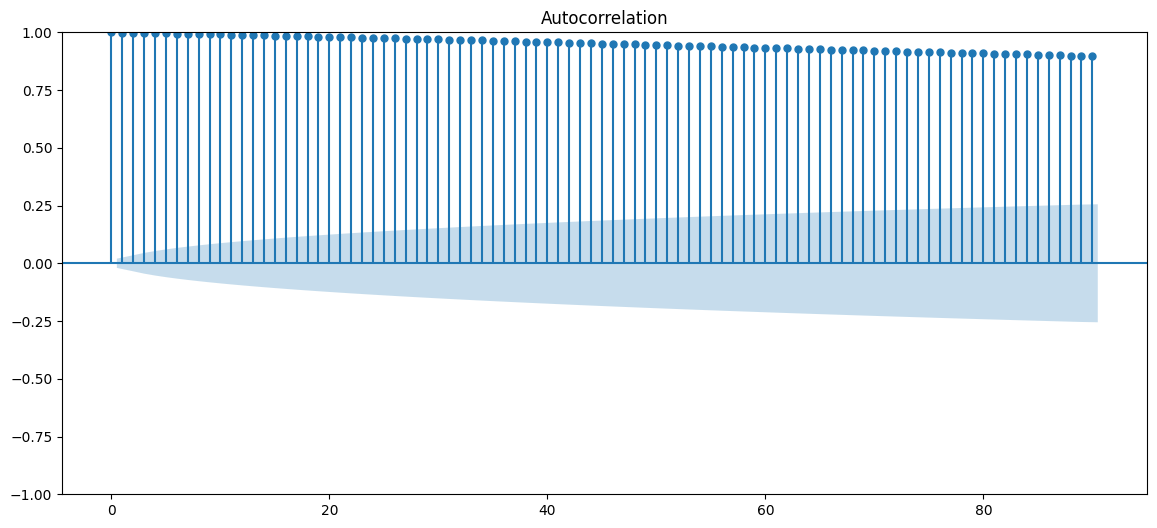

In [ ]:
# ACF plots and PACF plots on Original data sets
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
     plt.rc("figure", figsize=(14,6))
     tsa_plots.plot_acf(new_df.closingvalue,lags=90)
     plt.show()

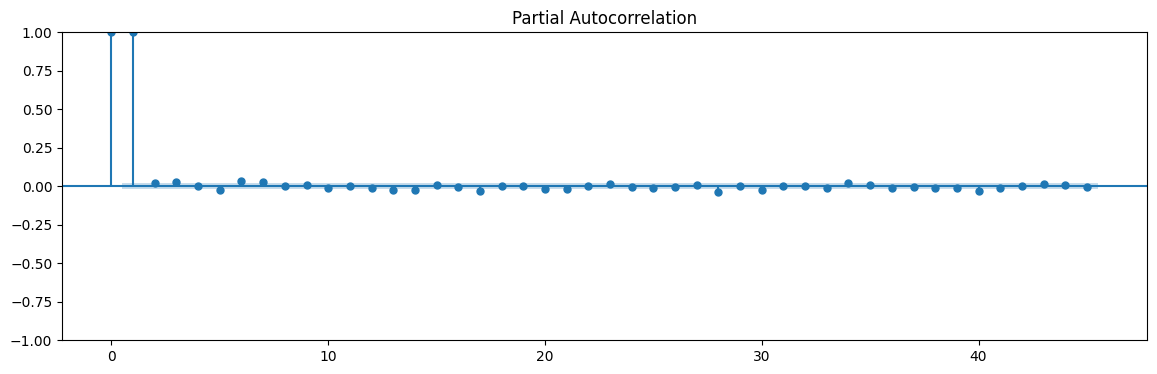

In [ ]:
with plt.rc_context():
    plt.rc("figure", figsize=(14,4))
    tsa_plots.plot_pacf(new_df.closingvalue,lags=45)
plt.show()

In [ ]:
train_data = new_df.iloc[:len(new_df) - 30]
test_data = new_df.iloc[len(new_df) - 30:]

SARIMA model

In [ ]:
# Runs auto_arima function to get the parameters for the SARIMA model
opt_model = auto_arima(train_data, maxiter=100, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=31694.129, Time=34.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=31743.894, Time=0.52 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=31741.785, Time=1.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=31741.480, Time=1.99 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=31742.138, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=31734.815, Time=21.69 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=31734.104, Time=4.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=31695.095, Time=26.92 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=31695.057, Time=22.94 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=31737.418, Time=4.51 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=31736.284, Time=8.84 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=31735.485, Time=7.91 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=31693.686, Time=52.48 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=31722.766, Time=20.05 sec
 ARIMA(3,1,4)

Model training

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


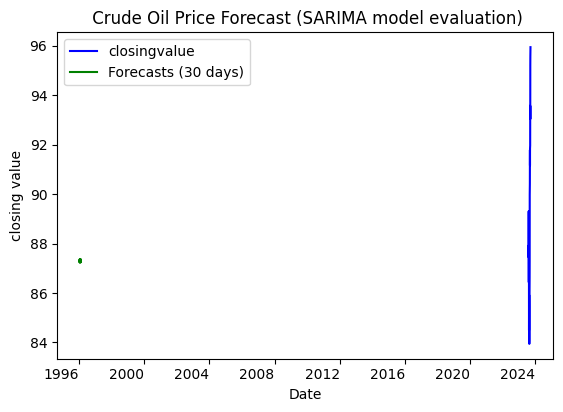

In [ ]:
 # Trains the model according to the auto_arima output -> (2,1,3)x(0,0,0,0)
sarima_model_eval = SARIMAX(train_data, order=(2, 1, 3), seasonal_order=(0, 0, 0, 0))
estimator_eval = sarima_model_eval.fit()

# Gets forecast for evaluation
preds = estimator_eval.forecast(len(test_data))

# Plot the results
test_data.plot(color='blue', label='Actual')
preds.plot(color='green', label='Forecasts (30 days)')

plt.title(' Crude Oil Price Forecast (SARIMA model evaluation)')
plt.xlabel('Date')
plt.ylabel('closing value')
plt.legend()
plt.show()

Model evaluation

In [ ]:
# To evaluate the models
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
rmse = np.sqrt(mean_squared_error(test_data.values, preds.values))
mae = mean_absolute_error(test_data.values, preds.values)
mape = mean_absolute_percentage_error(test_data.values, preds.values)

print('Root Mean Square Error (RMSE): {} \nMean Absolute Error (MAE): {} \nMean Absolute Percentage Error (MAPE): {}'. format(np.round(rmse, 3), np.round(mae, 3), np.round(mape, 3)))

Root Mean Square Error (RMSE): 3.854 
Mean Absolute Error (MAE): 3.015 
Mean Absolute Percentage Error (MAPE): 0.033


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


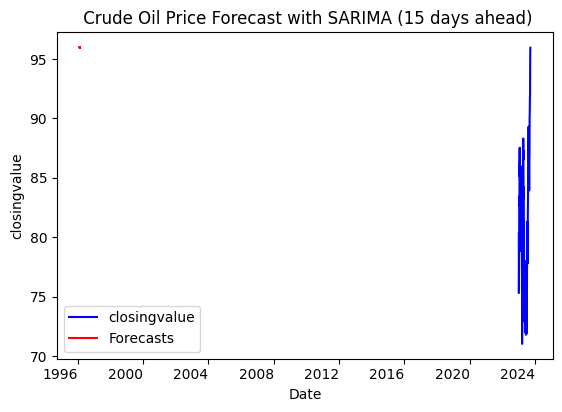

Forecasts for the following 15 days: 

9534    95.996639
9535    95.980692
9536    95.930757
9537    95.945281
9538    95.994272
9539    95.981116
9540    95.933074
9541    95.944916
9542    95.992005
9543    95.981426
9544    95.935291
9545    95.944659
9546    95.989839
9547    95.981632
9548    95.937408
Name: predicted_mean, dtype: float64


In [ ]:
# Sets the model
sarima_model_forecast = SARIMAX(new_df, order=(2,1,3), seasonal_order=(0,0,0,0))
estimator_forecast = sarima_model_forecast.fit()

# Makes predictions
steps_ahead = 15
forecasts = estimator_forecast.forecast(steps_ahead)
ci = estimator_forecast.conf_int()

# Displays the results
short_data = new_df[new_df.index.year>= 2023]
short_data.plot(color='blue', label='Actual')
forecasts.plot(color='red', label='Forecasts')

plt.title(' Crude Oil Price Forecast with SARIMA (15 days ahead)')
plt.xlabel('Date')
plt.ylabel('closingvalue')
plt.legend()
plt.show()

print('Forecasts for the following {} days: \n'.format(steps_ahead))
print(forecasts)

In [ ]:
# For LSTM model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.models import load_model  # Allows load a previously saved model.

In [ ]:
# Reshapes the data to feed the model
full_data_lstm = new_df.values.reshape(-1, 1)
train_data_lstm = train_data.values.reshape(-1, 1)
test_data_lstm = test_data.values.reshape(-1, 1)

# Defines train and test sets
X_train = []
y_train = []
ws = 30 # Window size: indicates the number of previous time steps. The more, may lead to higher accuracy, but increases complexity and training time.

for i in range(ws, len(train_data_lstm)):
    X_train.append(train_data_lstm[i - ws: i])
    y_train.append(train_data_lstm[i])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape = (X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=600)

Epoch 1/100
16/16 [==============================] - 13s 568ms/step - loss: 411.0025
Epoch 2/100
16/16 [==============================] - 9s 596ms/step - loss: 12.5480
Epoch 3/100
16/16 [==============================] - 5s 299ms/step - loss: 4.8689
Epoch 4/100
16/16 [==============================] - 5s 285ms/step - loss: 3.5746
Epoch 5/100
16/16 [==============================] - 6s 342ms/step - loss: 3.0383
Epoch 6/100
16/16 [==============================] - 4s 279ms/step - loss: 2.7520
Epoch 7/100
16/16 [==============================] - 6s 369ms/step - loss: 2.7210
Epoch 8/100
16/16 [==============================] - 4s 277ms/step - loss: 2.3552
Epoch 9/100
16/16 [==============================] - 4s 278ms/step - loss: 2.2122
Epoch 10/100
16/16 [==============================] - 6s 366ms/step - loss: 2.4937
Epoch 11/100
16/16 [==============================] - 4s 279ms/step - loss: 2.2675
Epoch 12/100
16/16 [==============================] - 5s 303ms/step - loss: 2.1327
Epoch 13/

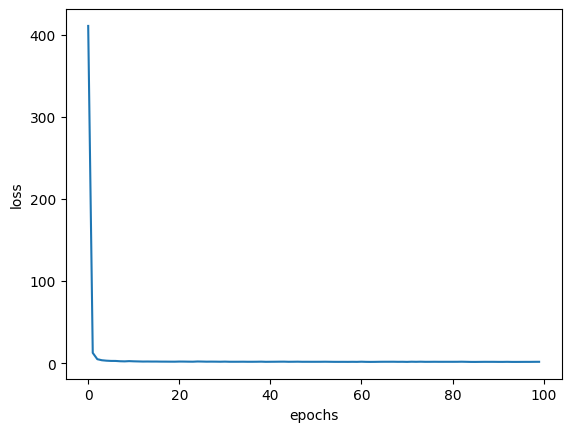

In [ ]:
plt.plot(range(len(model.history.history['loss'])), model.history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
model.save('model1')

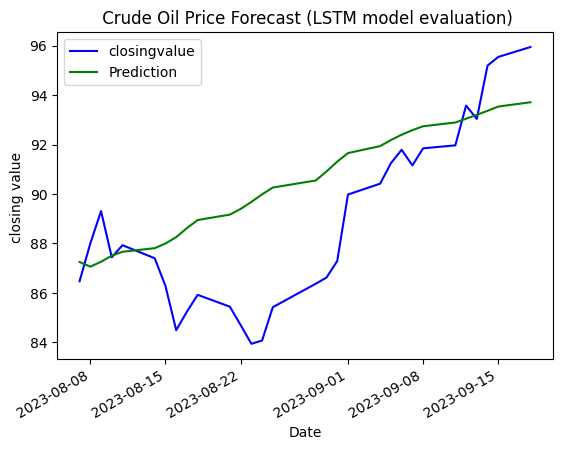

In [ ]:
prediction_set = []
batch_one = train_data_lstm[-ws:]
new_batch = batch_one.reshape((1, ws, 1))

for i in range(len(test_data)):
    pred = model.predict(new_batch, verbose=False)[0]
    prediction_set.append(pred)
    new_batch = np.append(new_batch[:, 1:, :], [[pred]], axis=1)

prediction_set = [i[0] for i in prediction_set] # Transforms a list of arrays into a list of single float items.
predictions = pd.Series(prediction_set, index=test_data.index)


# Plots the results
test_data.plot(color='blue', label='Actual')
predictions.plot(color='green', label='Prediction')

plt.title(' Crude Oil Price Forecast (LSTM model evaluation)')
plt.xlabel('Date')
plt.ylabel('closing value ')
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test_data_lstm, predictions))
mae = mean_absolute_error(test_data_lstm, predictions)
mape = mean_absolute_percentage_error(test_data_lstm, predictions)
print('Root Mean Square Error (RMSE): {} \nMean Absolute Error (MAE): {} \nMean Absolute Percentage Error (MAPE): {}'. format(np.round(rmse, 3), np.round(mae, 3), np.round(mape, 3)))

Root Mean Square Error (RMSE): 2.863 
Mean Absolute Error (MAE): 2.286 
Mean Absolute Percentage Error (MAPE): 0.026


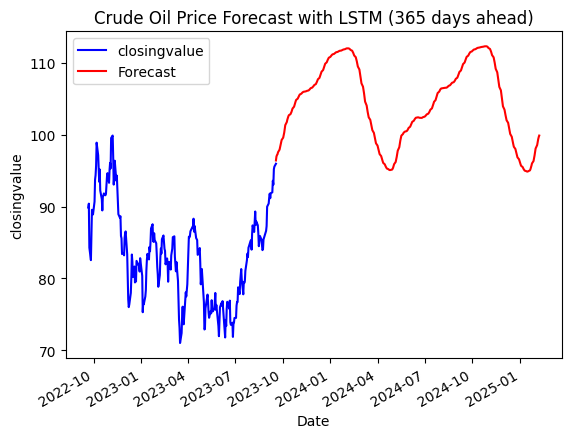

Forecasts for the following 365 days: 
2023-09-18    96.408272
2023-09-19    96.954895
2023-09-20    97.155312
2023-09-21    97.262802
2023-09-22    97.541252
                ...    
2025-02-03    98.543938
2025-02-04    98.982277
2025-02-05    99.357132
2025-02-06    99.654404
2025-02-07    99.866440
Freq: B, Name: Forecast, Length: 365, dtype: float32


In [ ]:
as# Makes the predictions
prediction_set = []
batch_one = full_data_lstm[-ws:]
new_batch = batch_one.reshape((1, ws, 1))
days_to_forecast = 365

for i in range(days_to_forecast):
    pred = model.predict(new_batch, verbose=False)[0]
    prediction_set.append(pred)
    new_batch = np.append(new_batch[:, 1:, :], [[pred]], axis=1)

prediction_set = [i[0] for i in prediction_set]  # Transforms a list of arrays into a list of single float items.
date_range = pd.date_range(test_data.index[-1], periods=days_to_forecast, freq='B')
forecast = pd.Series(prediction_set, index=date_range, name='Forecast')


# Displays results
short_data = new_df.iloc[-250:] # Last n datapoints of the original time series.

short_data.plot(color='blue', label='Actual')
forecast.plot(color='red')

plt.title('Crude Oil Price Forecast with LSTM (365 days ahead)')
plt.xlabel('Date')
plt.ylabel('closingvalue')
plt.legend()
plt.show()

print('Forecasts for the following {} days: '.format(days_to_forecast))
print(forecast)